<a href="https://colab.research.google.com/github/YooSeungWan12/ex02/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from IPython.core.display import display, HTML

display(HTML("<style>.container{width:90% !important;}</style>"))

이 코드는 Jupyter Notebook이나 Jupyter Lab과 같은 IPython 기반 환경에서 실행됩니다. 스타일 코드 <style>.container{width:90% !important;}</style>는 노트북 셀의 너비를 90%로 설정하는 역할을 합니다.

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner','exercise', 'body_shape'])


In [11]:
df

,calory,breakfast,lunch,dinner,exercise,body_shape


In [12]:
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']


In [13]:
df

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [ ]:
# 1-1. feature와 label나누기

In [14]:
x = df.drop('body_shape',axis=1)
y = df[['body_shape']]

In [21]:
# 1-2. 수치가 굉장히 높은 calory칼럼때문에 전체 데이터를 rescaling해주기.
#사이킷런의 standardScaler를 이용하여 각 feature가 같은 범위내에 있도록바꾸기
#아니면 normalization 사용

from sklearn.preprocessing import StandardScaler

In [23]:
x_std = StandardScaler().fit_transform(x)


In [25]:
x

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0
9,3000,1,2,1,1


In [24]:
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [26]:
#2. feature들의 Covariance Matrix만들기
# 각 칼럼별로 존재하는 feature 들을 row 순으로 변형시키는 과정이 필요하다. 그래야
# covariance Matrix 를 만들 수 있음
import numpy as np


2-1. feature 들을 칼럼방향이 아닌 row 방향으로 변환시킨다

In [27]:
features = x_std.T
#데이터프레임의 행과 열을 바꾸기위해 df.transpose나 df.T를 사용하면 된다.

In [28]:
features

array([[-1.35205803,  0.01711466,  0.61612771, -1.18091145,  1.89972711,
        -1.26648474,  0.18826125,  1.04399418, -0.15403193,  0.18826125],
       [ 0.        ,  0.        ,  1.29099445, -1.29099445,  1.29099445,
        -1.29099445,  0.        ,  1.29099445, -1.29099445,  0.        ],
       [-1.3764944 , -0.22941573,  0.91766294, -0.22941573,  0.91766294,
        -1.3764944 , -1.3764944 ,  0.91766294,  0.91766294,  0.91766294],
       [-1.28571429,  0.14285714,  0.14285714, -1.28571429,  1.57142857,
         0.14285714,  0.14285714,  1.57142857, -1.28571429,  0.14285714],
       [ 1.        ,  0.        , -1.        ,  2.        , -1.        ,
         1.        ,  0.        , -1.        , -1.        ,  0.        ]])

2-2. 각 feature 들이 row 방향으로 향해있다면, np.cov 를 이용해 covariance matrix 를 만들 수 있다

http://matrix.skku.ac.kr/math4ai-intro/W11/

공분산은 x의 편차와 y의 편차를 곱한 것의 평균이다.
이것을 보완하기 위해 상관계수(correlation)


공분산 행렬(covariance matrix)

행렬을 이용하면 여러 개의 확률변수가 서로 어떤 관계를 가지는지를 쉽게 표현할 수 있다. 특히, 각 데이터의 분산과 공분산을 이용해 만드는 공분산 행렬이 이에 해당한다.


In [29]:
covariance_matrix = np.cov(features)

In [30]:
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


3. c_matrix 를 이용해 EigenValue 의 최대값인 EigenVector(PC) 구하기



차원축소는 이미지(시각화)에서 자주쓴다.

1.차원축소를 이용하여, 고차원 데이터를 3 차원 이하로 축소시
킬 수 있고, 시각화가 가능해진다
2.그 이외에 이미지의 noise 제거에도 사용되며,
3.정보를 적은 차원에 적은 메모리로 저장되어, 퍼포먼스 향상에도 사용된다

분산이 가장 넓은 곳을 직선으로 표시하였다. 여기로 점들을 옮기게 된다
면각 점들이 퍼져있는 정도를 지켜줄 수 있게 된다. 그 결과 점들은 겹치지않게 된다

이게 pca알고리즘.
위에서 찾은 분산이 가장넓은 지역이 pc



feature(x1, x2)들의 Covariance Matrix 에 있는 Eigen Vector 이다.
EigenVector(PC)는 2 차원에서는 2 개가 존재한다.



• 이 과정에서는 np.linalg.eig()이 사용된다. 이 때 eigen_value 와eigen_vector 리스트를 반환해준다. 

• feature 가 5 개인 5 차원이므로, eigen_vector 도 5 개가 나온다.


In [31]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
#고유값 (Eigenvalue), 고유벡터 (Eigenvector): w, v = np.linalg.eig(x)


In [32]:
eig_vals

array([4.0657343 , 0.8387565 , 0.07629538, 0.27758568, 0.2971837 ])

In [33]:
eig_vecs

array([[-0.508005  , -0.0169937 , -0.84711404,  0.11637853,  0.10244985],
       [-0.44660335, -0.36890361,  0.12808055, -0.63112016, -0.49973822],
       [-0.38377913,  0.70804084,  0.20681005, -0.40305226,  0.38232213],
       [-0.42845209, -0.53194699,  0.3694462 ,  0.22228235,  0.58954327],
       [ 0.46002038, -0.2816592 , -0.29450345, -0.61341895,  0.49601841]])

3-1. eig_vals 의 최대값을 눈으로 확인후 가져오
고, 전체 중 비율을 구한다.¶

• 만약 하나의 eig_vecs 만 사용한다면, 5->1 차원으로 줄이면서

• 전체 중 비율값이 = 전체정보 중 그만큼의 정보를 유실없이 가진다는 뜻이다.

In [34]:
eig_vals[0] / sum(eig_vals)
#1 개의 eigen_vector 사용으로 5->1 차원 축소시 73% 정보 유실이 없는채로 축소할 것이다

0.7318321731427544

3-2. 해당 eigen_vector 를 이용해, 칼럼방향별 feature 데이터를 projection 시킨다.

 projection 이란 eigen_vector 직선위에 모든 데이터를 올려놓겠다는 의미이다.

In [41]:
# 칼럼방향의 feautre array 를 dot 연산을 통해 아이겐벡터 최대값(eig_vecs[0])에projection 시킨다.
# 이 때, eig_vecs 는 row 방향별 feature 로 생성한 것이므로, T 로 뒤집어준다.
projected_X = x_std.dot(eig_vecs.T[0])



''' 

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

와 array([-0.508005  , -0.44660335, -0.38377913, -0.42845209,  0.46002038])를 계산한것으로
[-1.35205803*-0.508005 + .....]
식해서 값이 10개가나온다.,

'''

파이썬 넘파이 내적 함수 : np.dot()



In [37]:
eig_vecs.T[0]

array([-0.508005  , -0.44660335, -0.38377913, -0.42845209,  0.46002038])

In [38]:
projected_X

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

In [39]:
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

3-3. PCA 로 프로젝션된 각 데이터들을 df 로 만들자

In [45]:
result = pd.DataFrame(projected_X , columns=['PC1']) #열이름 PC1로 데이터프레임 생성.
result['y-axis'] = 0.0
result['label'] = y

In [46]:
result

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


4. 이제 5 차원--> PC(eigen_vector)로 프로젝션--> 1 차원 된 데이터들을 시각화

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'PCA result')

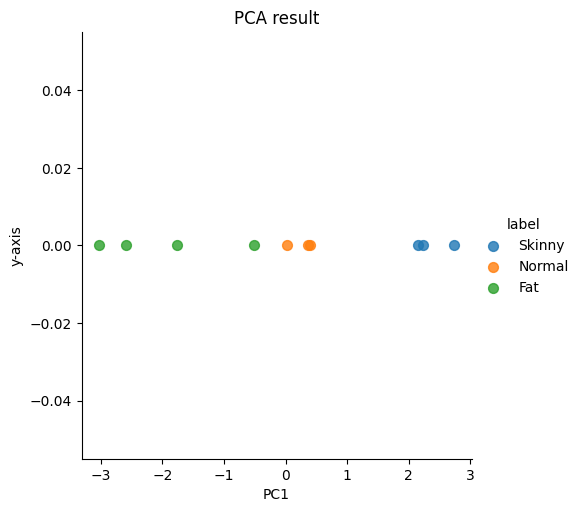

In [49]:
sns.lmplot(x='PC1', y='y-axis', data=result, fit_reg=False, # x-axis, y-axis, data, no line 
scatter_kws={"s": 50}, # marker size 
hue="label") # color# 
plt.title('PCA result')

5. 사이킷런 PCA 모듈로 한번에 표시하기

In [50]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)

In [51]:
sklearn_pca_x

array([[-2.22600943],
       [-0.0181432 ],
       [ 1.76296611],
       [-2.73542407],
       [ 3.02711544],
       [-2.14702579],
       [-0.37142473],
       [ 2.59239883],
       [-0.39347815],
       [ 0.50902498]])

In [53]:
projected_X # 값이 -만 차이나는듯?  아마 그래프도 x위치만 바뀔듯..

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

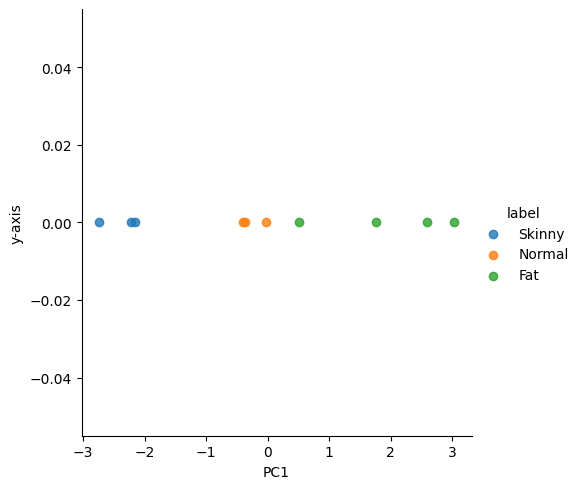

In [54]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = y
sns.lmplot(x='PC1', y='y-axis', data=sklearn_result, fit_reg=False, # x-axis, yaxis, data, no line scatter_kws={"s": 50}, # marker size 
hue="label") # color